In [1]:
# Place import statements here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# DSCI6003 Lab - Gaussian Mixture Models

Similar to yesterday, we will be looking at Gaussian Mixture models and how it compares to other clustering algorithms. The goal for today is: 

1. Understand the algorithm behind Gaussian mixture models (and how it works).
2. Look at the different behaviour between GMM and KMeans. 
3. Experiment with using unsupervised techniques on supervised data. 

### Part 1: Implementing GMM
    1. Generate the data. We will use code to do that. Run the code sample below and produce a plot of the data. 
    2. Fit a GMM model to it. 
    3. Look at a plot of the silhouette score for varying values of n_components. What do you notice? 
    4. Plot the location of the centers (mean values).

### Part 2: Comparing to KMeans
    1. Notice that the class_weights variable is set to 0.6 (in the function call). Check the silhouette score for KMeans over various values for n_clusters. What is the optimal number of parameters? Compare it with the silhouette score for GMM. 
    2. Plot the centroids for the optimal parameter value. Where are they placed? Is it similar to the mean values for GMM? 
    3. Now change the class_weights variable to a valued such as 21. How does this change the plot? 
    4. With this new sample dataset, get the silhouette score for KMeans and GMM. What do you notice about the optimal parameters? Did they change? 
    5. Plot the centroids for n_components and n_clusters being 2. How do they differ between GMM and KMeans 

### Part 3: Experimenting on Supervised Data
    1. Load the iris dataset from sklearn. 
    2. Do a train/test split on your data using random_state = 123412.
    3. Run a GMM on it. What accuracy score do you get? 
    4. Run KMeans on it. What score do you get? 
    5. Run a Random Forest on it. What score do you get? 
    
    Note: You might have to run the cell a few times to get the optimal score (since 0,1,2 labels are randomly given in the unsupervised cases).

0.00632453617818


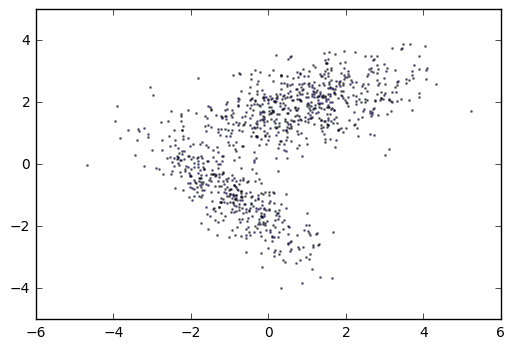

In [2]:
def q(x, y, weights):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return weights*g1+28.4*g2/(weights+28.4)

def sample(class_weights):
    N = 10000
    s = 10
    r = np.zeros(2)
    p = q(r[0], r[1], class_weights)
    print(p)
    samples = []
    for i in range(N):
        rn = r + np.random.normal(size=2)
        pn = q(rn[0], rn[1],class_weights)
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        if i % s == 0:
            samples.append(r)

    samples = np.array(samples)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
    return samples

s = sample(0.6)